In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
data01to14=pd.read_csv('data/03_District_wise_crimes_committed_against_children_2001_2012.csv')
print(len(data01to14))
data01to14.head()

9839


,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
district=[]
for i in data01to14['DISTRICT']:
    if ' ' in i:
        temp=i.find(' ')
        if i.count(' ')==1:
            district.append(i[0]+i[1:temp+1].lower()+i[temp+1]+i[temp+2:].lower())
        else:
            temp2=i.rfind(' ')
            district.append(i[0]+i[1:temp+1].lower()+i[temp+1]+i[temp+2:temp2].lower()+i[temp2+1]+i[temp2+2:].lower())
    else:
        district.append(i[0]+i[1:].lower())
district[:5]

['Adilabad', 'Anantapur', 'Chittoor', 'Cuddapah', 'East Godavari']

In [7]:
children=pd.DataFrame({'district':district,'children':data01to14['Total']})
children

,district,children
0,Adilabad,0
1,Anantapur,66
2,Chittoor,0
3,Cuddapah,0
4,East Godavari,0
...,...,...
9833,Lakshadweep,0
9834,Total,0
9835,Karaikal,4
9836,Puducherry,43


In [3]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp" 
map_df=gpd.read_file(fp)
map_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,Chittoor,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


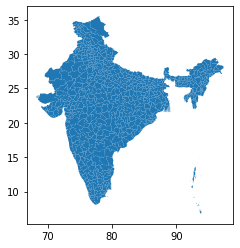

In [9]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp" 
map_df=gpd.read_file(fp)
map_df = map_df[['NAME_2', 'geometry']]
map_df.plot()
mergedchildren = map_df.set_index('NAME_2').join(childrendren.set_index('district'))

In [10]:
mergedchildren.head()

,geometry,children
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",0.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",0.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",0.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",4.0
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",8.0


In [12]:
mergedchildren.isna().sum()

geometry      0
children    181
dtype: int64

In [14]:
mergedchildren['children'].fillna(mergedchildren['children'].mean(), inplace=True)

In [15]:
mergedchildren.isna().sum()

geometry    0
children    0
dtype: int64

<AxesSubplot:>

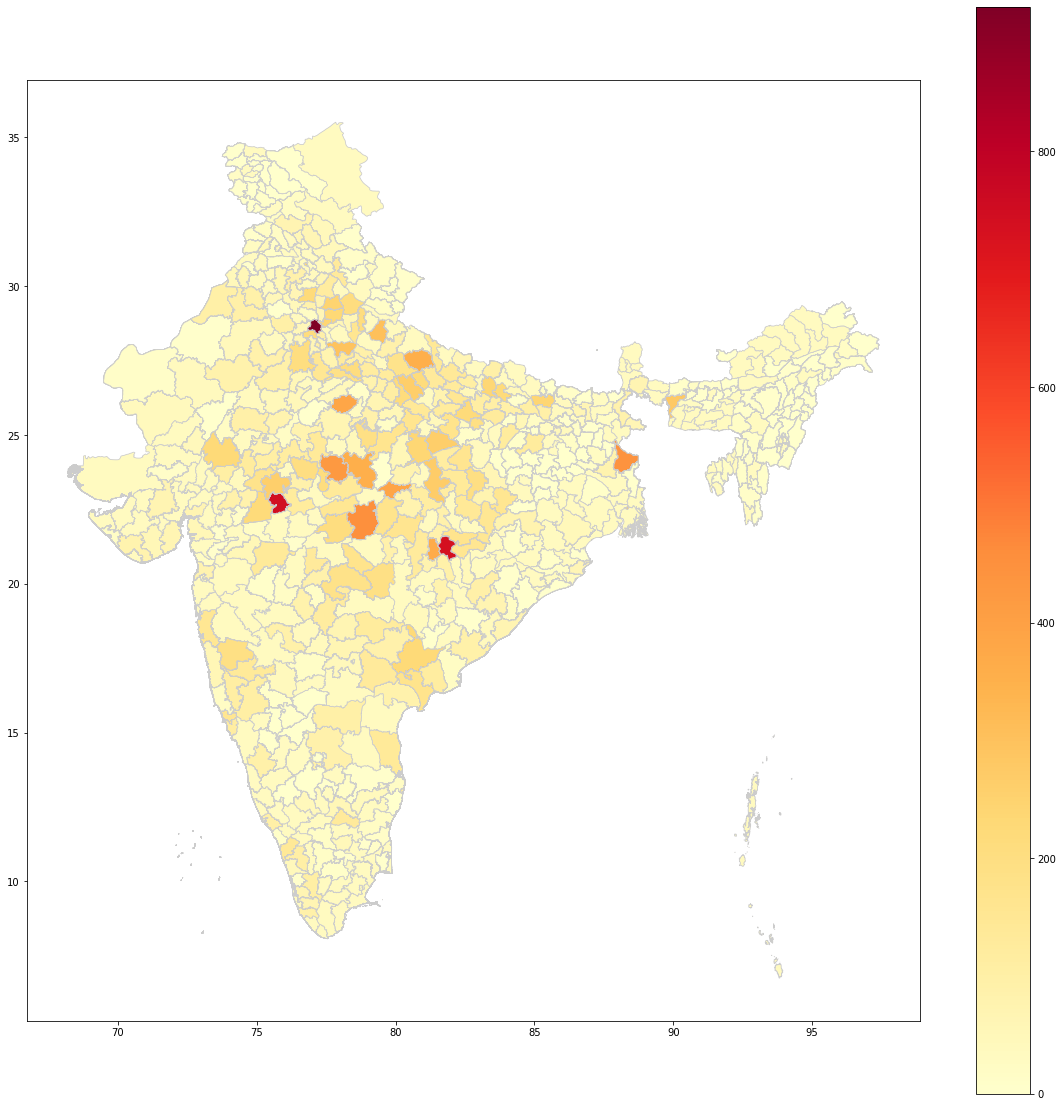

In [17]:
fig, ax = plt.subplots(1, figsize=(20,20))
mergedchildren.plot(column='children', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)